In [1]:
import yellowcab
import pandas as pd

In [2]:
# read in trip data
trip_data_raw = yellowcab.io.read_all_files('parquet', raw=True)
trip_data_raw = yellowcab.io.filter_borough(trip_data_raw)
trip_data_raw = yellowcab.io.add_duration(trip_data_raw)
trip_data_raw = yellowcab.io.add_datetime_columns(trip_data_raw)

In [3]:
# duration and distance should be positive
trip_data_raw = trip_data_raw[trip_data_raw["duration"] > 0]
trip_data_raw = trip_data_raw[trip_data_raw["trip_distance"] > 0]

In [4]:
six = 6 * 60 * 60 # 6h
eight = 8 * 60 * 60 # 8h
twelve  = 12 * 60 * 60 # 12h

In [5]:
split=eight
# trip length can be quantified by the duration or the distance of the trip

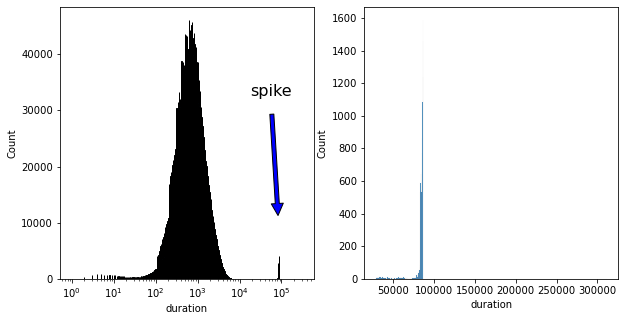

In [6]:
# on the right side of the distribution is a spike at 86.400s = 24h
yellowcab.vis.split_hist(trip_data_raw, col="duration", split=split)

Plotting 16924 instances with duration above 28800


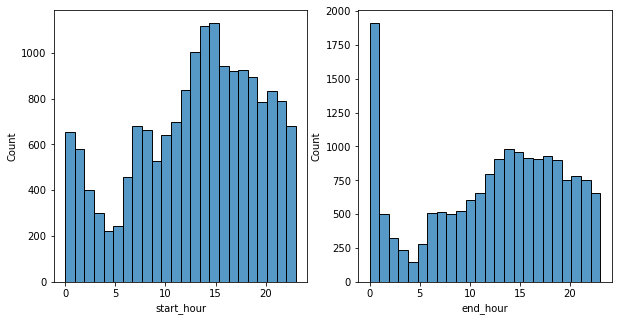

In [7]:
# compare the distribution of trips hourly starting and ending
yellowcab.vis.compare_hist(trip_data_raw, col="duration", split=split)

In [8]:
trip_length="trip_distance"

In [9]:
del trip_data_raw

In [10]:
trip_data = yellowcab.io.read_all_files('parquet')

In [11]:
# duration and distance should be positive
trip_data = trip_data[trip_data["duration"] > 0]
trip_data = trip_data[trip_data["trip_distance"] > 0]

In [12]:
df_stats = pd.DataFrame()
df_stats["mean"] = yellowcab.io.get_stats(trip_data, metric=trip_length, stat="mean")[trip_length]
df_stats["std"] = yellowcab.io.get_stats(trip_data, metric=trip_length, stat="std")[trip_length]
df_stats

,mean,std
month,,
1,4.038362,5.129148
2,3.854882,4.930614
3,3.857817,4.821324
4,3.081177,3.749030
5,3.222584,4.001888
6,3.608685,4.377969
7,3.506243,4.319737
8,3.540055,4.376529
9,3.278559,3.996087


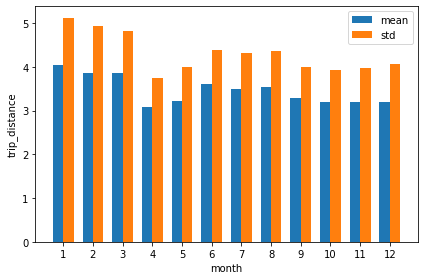

In [13]:
yellowcab.vis.double_barplot(df_stats, col=trip_length)

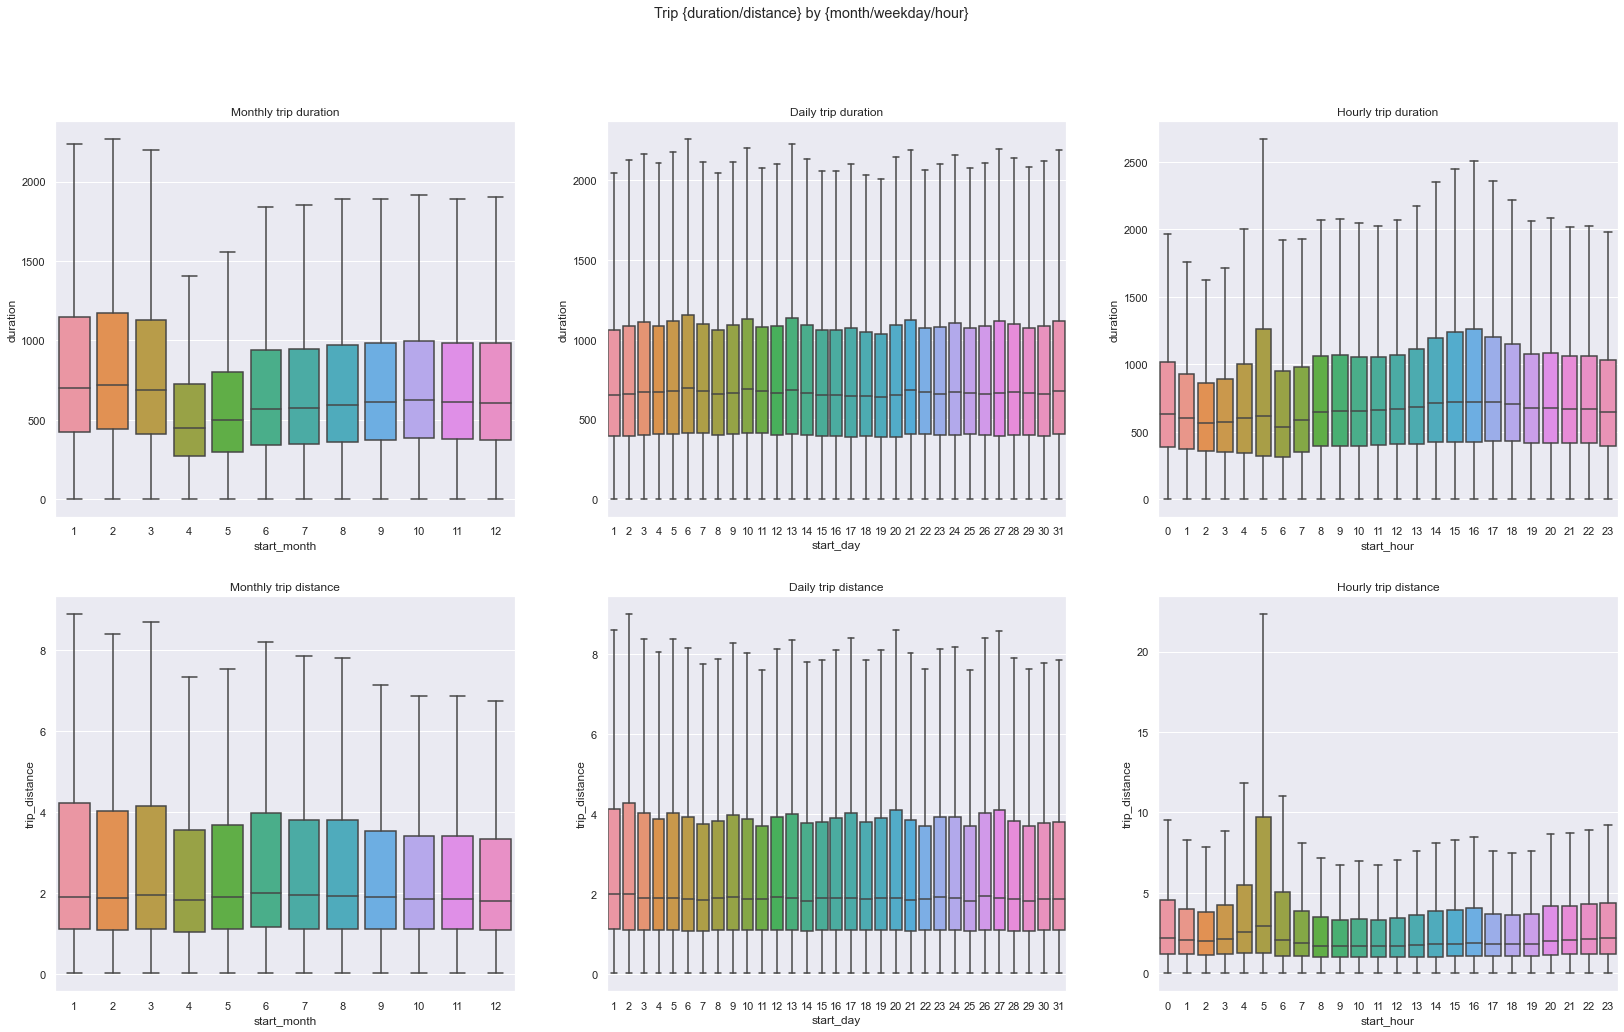

In [14]:
# visualize trip length
yellowcab.vis.visualize_trip_lengths(trip_data)

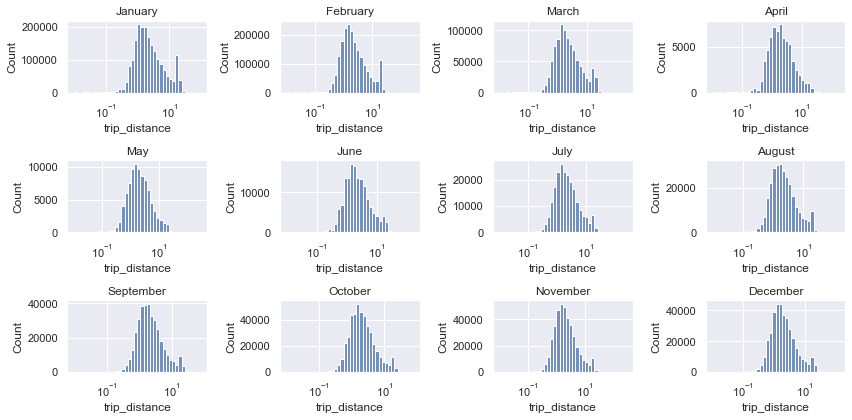

In [15]:
# plot the monthly distribution of trip length as histogram by duration or distance
yellowcab.vis.monthly_hist(trip_data, col=trip_length)

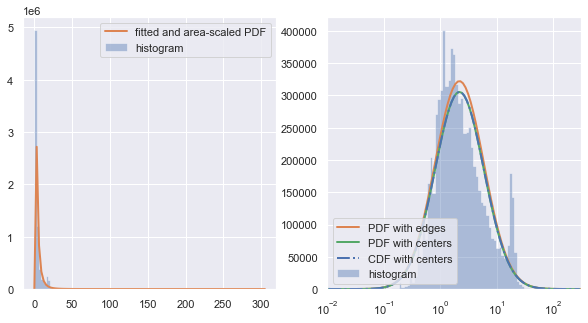

In [16]:
# plot the overall distribution on linear scale (left) vs log scale (right)
yellowcab.vis.log_distr(trip_data, col=trip_length)

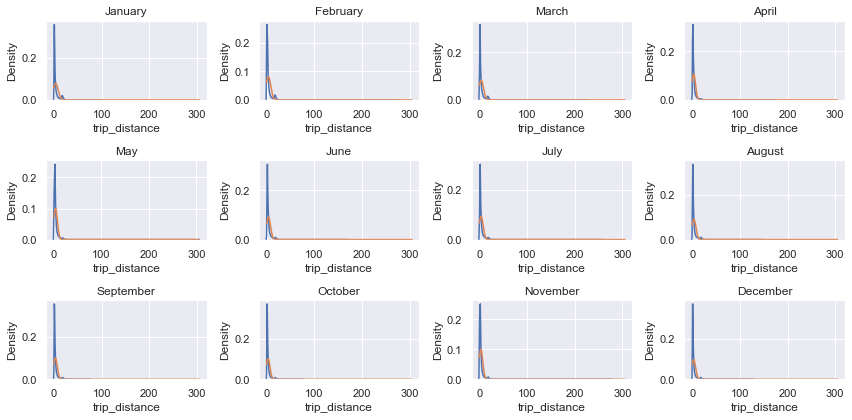

In [17]:
# plot the kde of the given data and a normal distribution with the same mean and std
yellowcab.vis.monthly_kde(trip_data, col=trip_length)

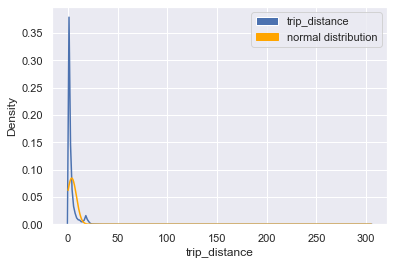

In [18]:
# compare the density function of the data to the density function of a normal distribution
yellowcab.vis.compare_distr(trip_data, col=trip_length)